<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analysis/blob/main/Car%20Sales%20Analysis/Car_Sales_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application and use cases
1. Market Analysis:
Evaluate overall trends and regional variations in car sales to assess manufacturer performance, model preferences, and demographic insights.
2. Seasonal Patterns and Competitor Analysis:
Investigate seasonal and cyclical patterns in sales.
3. Forecasting and Predictive Analysis
Use historical data for forecasting and predict future market trends.
Support marketing, advertising, and investment decisions based on insights.
4. Supply Chain and Inventory Optimization:
Provide valuable data for stakeholders in the automotive industry.

Aplikasi dan kasus penggunaan
1. Analisis Pasar: Mengevaluasi tren keseluruhan dan variasi regional dalam penjualan mobil untuk menilai kinerja pabrikan, preferensi model, dan wawasan demografis.
2. Pola Musiman dan Analisis Pesaing: Selidiki pola musiman dan siklus dalam penjualan.
3. Peramalan dan Analisis Prediktif Gunakan data historis untuk memperkirakan dan memprediksi tren pasar di masa depan. Mendukung keputusan pemasaran, periklanan, dan investasi berdasarkan wawasan.
4. Optimalisasi Rantai Pasokan dan Inventaris: Menyediakan data berharga bagi para pemangku kepentingan di industri otomotif.

source : https://www.kaggle.com/datasets/missionjee/car-sales-report

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount ('/content/gdrive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive


## Data Cleaning

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Car Sales_Dataset/Car_Sales.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
df.shape

(23906, 16)

### Remove Columns

In [5]:
df.drop(columns=(['Car_id','Phone', 'Customer Name']), inplace=True)
df.head(2)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown
1,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora


In [6]:
df.isna().sum()

,0
Date,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0
Color,0
Price ($),0


### Duplicated Check

In [7]:
df.duplicated().sum()

0

### Data Type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Gender         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
 3   Dealer_Name    23906 non-null  object
 4   Company        23906 non-null  object
 5   Model          23906 non-null  object
 6   Engine         23906 non-null  object
 7   Transmission   23906 non-null  object
 8   Color          23906 non-null  object
 9   Price ($)      23906 non-null  int64 
 10  Dealer_No      23906 non-null  object
 11  Body Style     23906 non-null  object
 12  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.4+ MB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

### Outliers

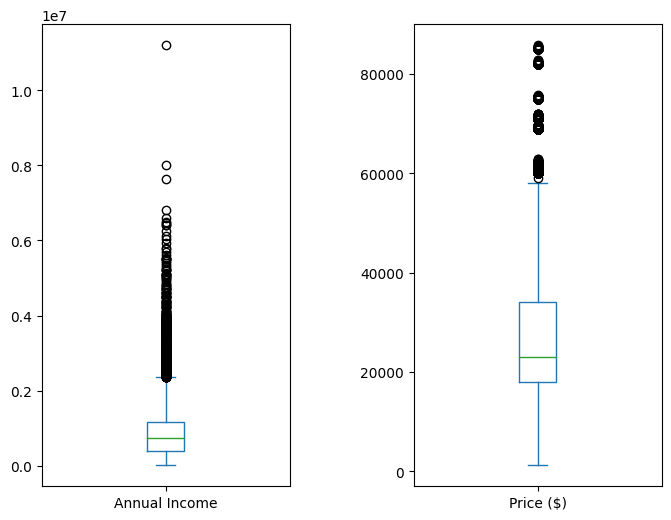

In [10]:
df.select_dtypes(include=['int','float']).plot(subplots=True, layout=(1,2), kind='box', figsize=(8,6))
plt.subplots_adjust(wspace=0.5)

### Data Distribution

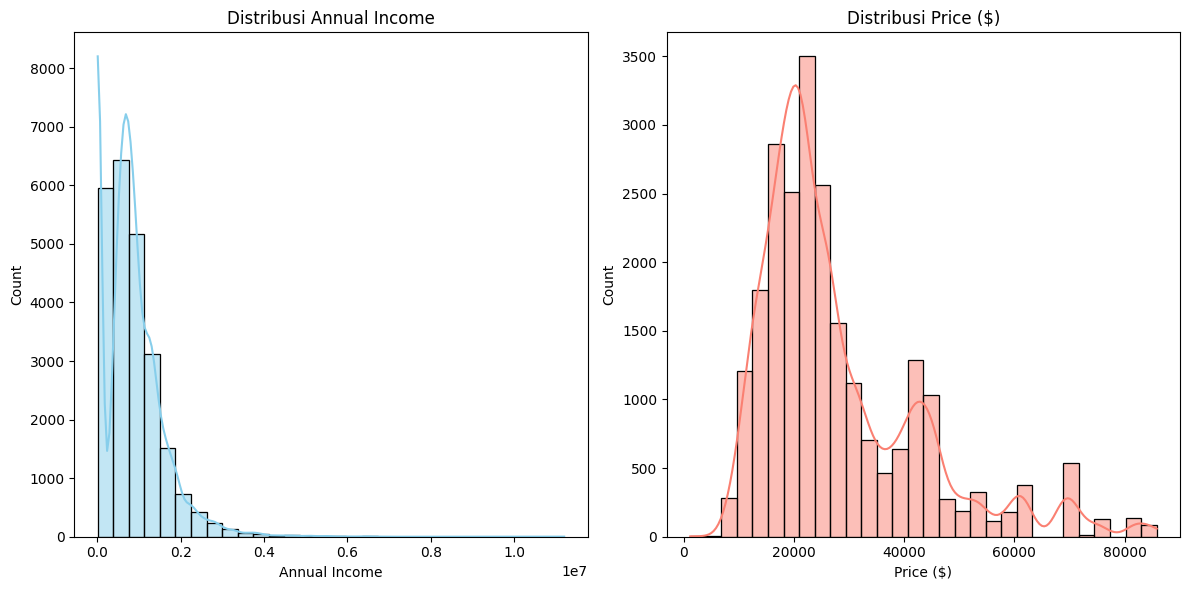

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Price ($)'], bins=30, kde=True, color='salmon')
plt.title('Distribusi Price ($)')

plt.tight_layout()
plt.show()

### Data Corelation

Matriks Korelasi:
               Annual Income  Price ($)
Annual Income       1.000000   0.012065
Price ($)           0.012065   1.000000


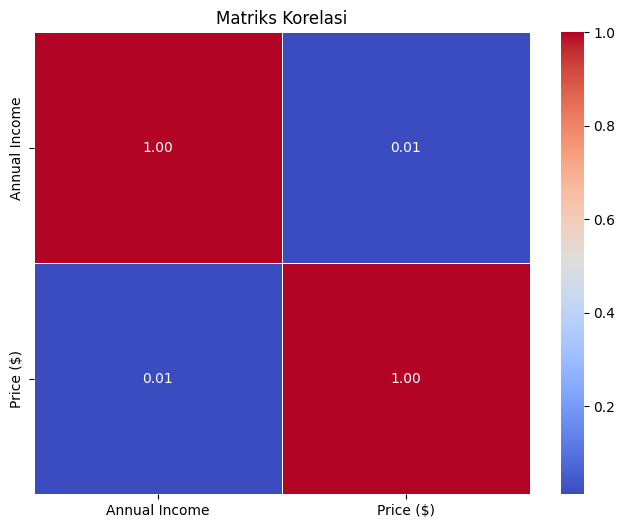

In [15]:
# Hitung matriks korelasi untuk kolom numerik
correlation_matrix = df[['Annual Income', 'Price ($)']].corr()

# Print matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

# Plot Heatmap untuk matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

In [16]:
import scipy.stats as stats

# Misalkan df adalah DataFrame yang sudah dimuat
# df = pd.read_csv('data.csv')

# Contoh uji ANOVA antara 'Price ($)' berdasarkan 'Company'
f_value, p_value = stats.f_oneway(*[group['Price ($)'].values for name, group in df.groupby('Company')])

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

# Interpretasi
if p_value < 0.05:
    print("Ada perbedaan signifikan dalam harga berdasarkan perusahaan.")
else:
    print("Tidak ada perbedaan signifikan dalam harga berdasarkan perusahaan.")

F-value: 51.25889697948616
P-value: 8.18568334890313e-286
Ada perbedaan signifikan dalam harga berdasarkan perusahaan.


In [17]:
# Tabel kontingensi antara 'Gender' dan 'Body Style'
contingency_table = pd.crosstab(df['Gender'], df['Body Style'])

print("Tabel Kontingensi:")
print(contingency_table)

# Uji Chi-Square
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi2-value: {chi2}")
print(f"P-value: {p_value}")

# Interpretasi
if p_value < 0.05:
    print("Ada hubungan signifikan antara Gender dan Body Style.")
else:
    print("Tidak ada hubungan signifikan antara Gender dan Body Style.")

Tabel Kontingensi:
Body Style  Hardtop  Hatchback  Passenger   SUV  Sedan
Gender                                                
Female          647       1298        883  1335    945
Male           2324       4830       3062  5039   3543
Chi2-value: 3.7811059955061026
P-value: 0.43643965301514065
Tidak ada hubungan signifikan antara Gender dan Body Style.


## Market Analysis

In [26]:
df.head(2)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown
1,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora


### Transaction by Dealer_Region

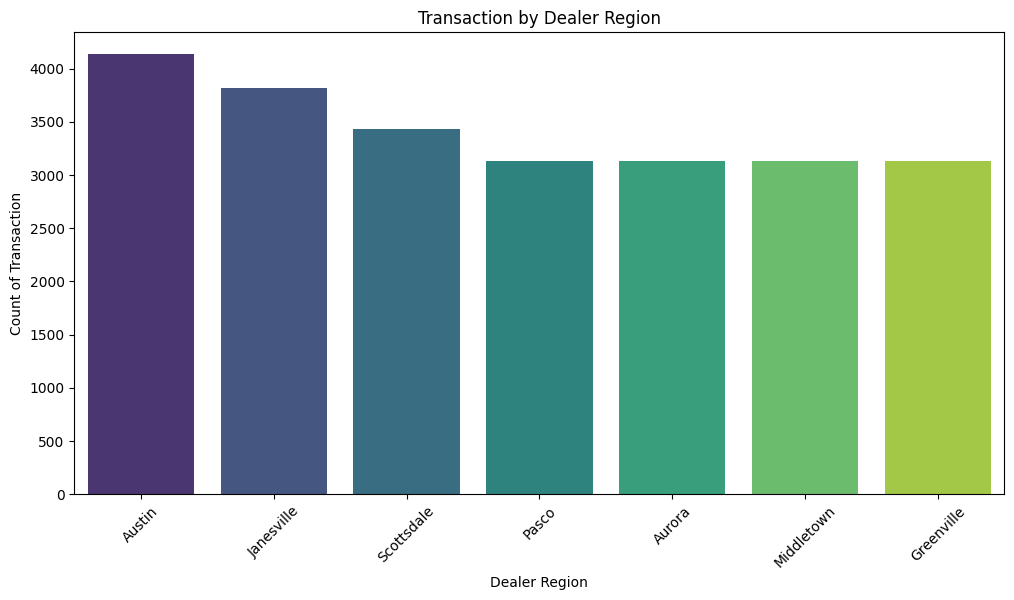

In [22]:
transaction_counts = df['Dealer_Region'].value_counts().reset_index()
transaction_counts.columns = ['Dealer_Region', 'Transaction_Count']

# Plot Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=transaction_counts, x='Dealer_Region', y='Transaction_Count', palette='viridis')
plt.title('Transaction by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Count of Transaction')
plt.xticks(rotation=45)  # Rotasi label x-axis jika perlu
plt.show()

### Why are the most transactions in Austin ?

#### Whether their annual income is higher than others ?

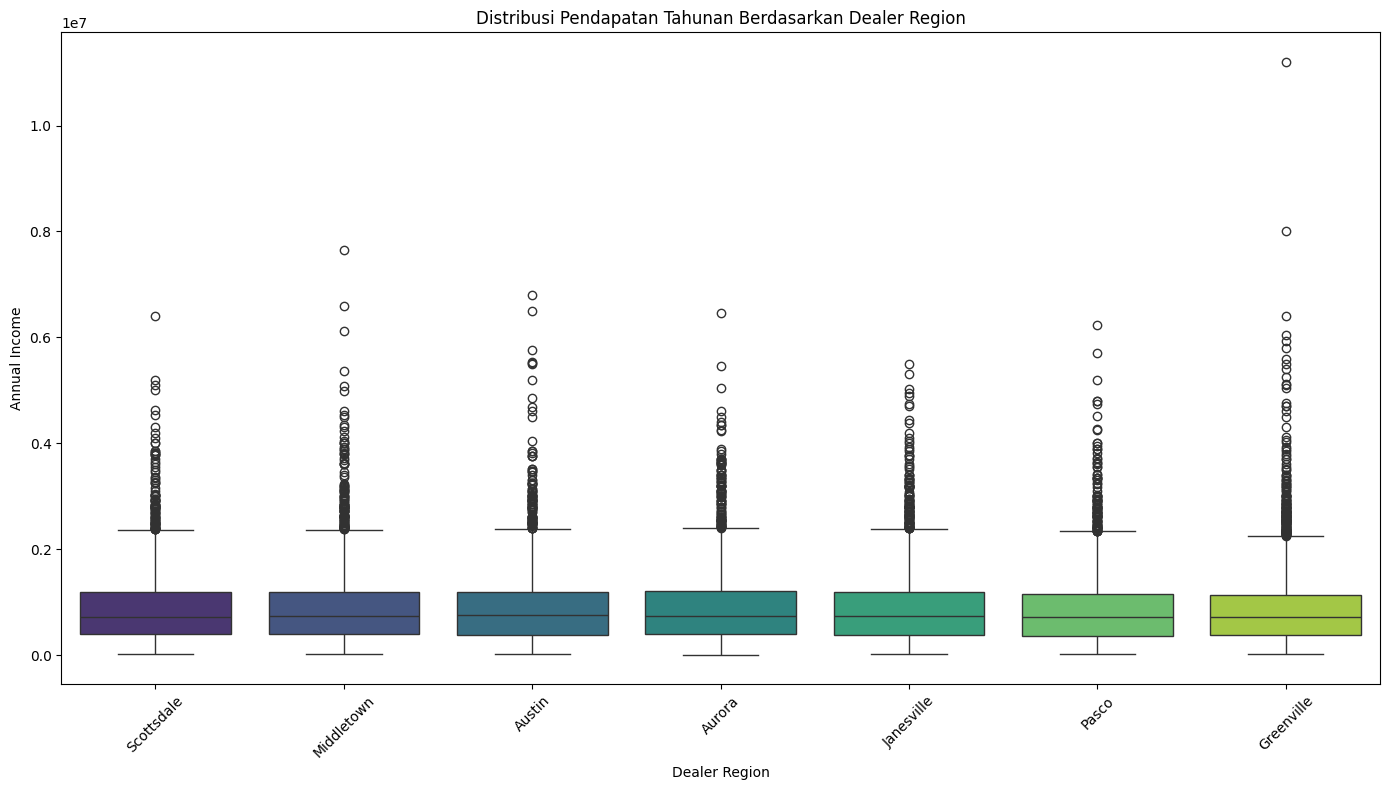

In [25]:
plt.figure(figsize=(14, 8))

# Membuat box plot
sns.boxplot(data=df, x='Dealer_Region', y='Annual Income', palette='viridis')

# Menambahkan label dan judul
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.title('Distribusi Pendapatan Tahunan Berdasarkan Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Annual Income')

# Mengurutkan x-axis berdasarkan median Annual Income
medians = df.groupby('Dealer_Region')['Annual Income'].median().sort_values()
plt.gca().set_xticklabels(medians.index, rotation=45)

plt.tight_layout()
plt.show()

apparently not, annual income is not the cause

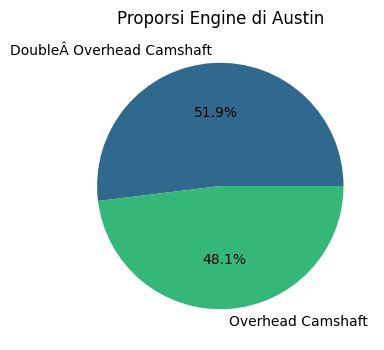

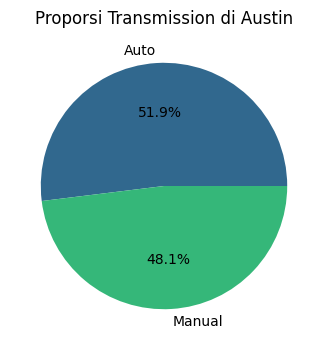

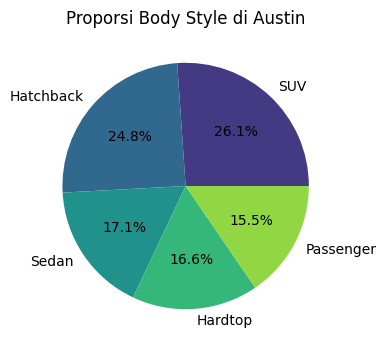

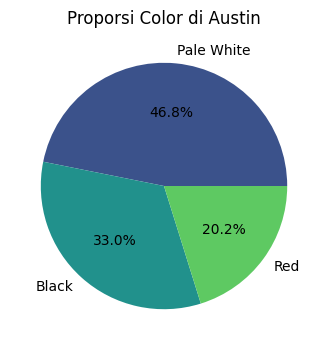

In [35]:
# Daftar kategori yang akan diproses
categories = ['Engine', 'Transmission', 'Body Style', 'Color']

# Loop melalui kategori dan plot pie chart
for category in categories:
    plt.figure(figsize=(4, 4))

    # Hitung frekuensi untuk kategori saat ini
    counts = austin_data[category].value_counts()

    # Plot Pie Chart
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(counts)))
    plt.title(f'Proporsi {category} di Austin')

    # Tampilkan plot
    plt.show()